# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [2]:
df = pd.read_csv("creditcard.csv", sep=',')
df.shape

(284807, 31)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts() # Можем наблюдать несбалансированные между собой классы

0    284315
1       492
Name: Class, dtype: int64

In [146]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
X.shape, y.shape

((284807, 30), (284807,))

In [7]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler().fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test) # Скейлим тест по трейну

In [20]:
# Количество классов 0 преобладает, давайте возьмем модель, которая всегда будет предсказывать 0
const_0_predict = np.zeros(y_test.shape[0])

# Logistic Regression
log_reg = LogisticRegression().fit(X_train_scale, y_train)
log_predict = log_reg.predict(X_test_scale)
log_pred_proba = log_reg.predict_proba(X_test_scale)[:, 1] # Вероятность того, что объект принадлежит классу 1

#KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_scale, y_train)
knn_predict = knn.predict(X_test_scale)
knn_pred_proba = knn.predict_proba(X_test_scale)[:, 1]


In [21]:
# Давайте посмотрим на метрики
print(f'Const 0:\n\taccuracy={accuracy_score(y_test, const_0_predict)}\n\
        precision={precision_score(y_test, const_0_predict, zero_division=0)}\n\
        recall={recall_score(y_test, const_0_predict)}\n\
        f1_score={f1_score(y_test, const_0_predict)}\n\
        roc_auc={roc_auc_score(y_test, const_0_predict)}')

print(f'Log reg:\n\taccuracy={accuracy_score(y_test, log_predict)},\n\
        precision={precision_score(y_test, log_predict, zero_division=0)}\n\
        recall={recall_score(y_test, log_predict)}\n\
        f1_score={f1_score(y_test, log_predict)}\n\
        roc_auc={roc_auc_score(y_test, log_predict)}')

print(f'KNN:\n\taccuracy={accuracy_score(y_test, knn_predict)},\n\
        precision={precision_score(y_test, knn_predict, zero_division=0)}\n\
        recall={recall_score(y_test, knn_predict)}\n\
        f1_score={f1_score(y_test, knn_predict)}\n\
        roc_auc={roc_auc_score(y_test, knn_predict)}')

Const 0:
	accuracy=0.9982795547909132
        precision=0.0
        recall=0.0
        f1_score=0.0
        roc_auc=0.5
Log reg:
	accuracy=0.9991222218320986,
        precision=0.8636363636363636
        recall=0.5816326530612245
        f1_score=0.6951219512195121
        roc_auc=0.7907371903460314
KNN:
	accuracy=0.9995435553526912,
        precision=0.95
        recall=0.7755102040816326
        f1_score=0.8539325842696629
        roc_auc=0.8877199304032249


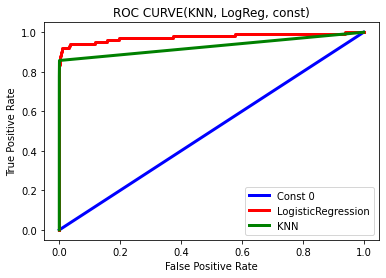

In [13]:
# Построим ROC curve для трех алгоритмов
const_fpr, const_tpr, _ = roc_curve(y_test, const_0_predict)
plt.plot(const_fpr, const_tpr, 'b', linewidth=3, label='Const 0')

lr_fpr, lr_tpr, _ = roc_curve(y_test, log_pred_proba)
plt.plot(lr_fpr, lr_tpr, 'r', linewidth=3, label='LogisticRegression')

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred_proba) # Забавно knn предсказывает вероятности, конечно...
plt.plot(knn_fpr, knn_tpr, 'g', linewidth=3, label='KNN')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE(KNN, LogReg, const)')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Ответ: будем максимизировать F1, так как в данной задаче нам необходимо, чтобы алгоритм точно и в полной мере выявлял подозрительные транзакции.
       Не хотелось бы доставлять нашим клиентам неудобство, блокируя их счета. Жаль, что этого не избежать...

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS

In [55]:
# Logistic Regression

# parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# lr = LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000)
# clf = GridSearchCV(lr, param_grid=parameters, scoring='f1').fit(X_train_scale, y_train)

Cs = np.arange(0.1, 2, 0.1)
errors = []

for C in Cs:
    lr = LogisticRegression(C=C, solver='liblinear', max_iter=10000, random_state=42).fit(X_train_scale, y_train)
    y_pred = lr.predict(X_test_scale)
    
    errors.append((C, f1_score(y_test, y_pred)))


best_C, best_score = max(errors, key=lambda x: x[1])
print(f'LogisticRegression:\n\tC={C}\n\tf1={best_score}')

LogisticRegression:
	C=1.9000000000000001
	f1=0.6951219512195121


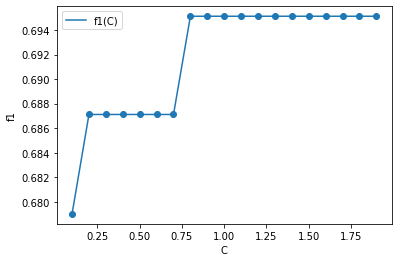

In [56]:
errors = np.array(errors)

plt.plot(errors[:, 0], errors[:, 1], label='f1(C)')
plt.scatter(errors[:, 0], errors[:, 1])
plt.xlabel('C')
plt.ylabel('f1')
plt.legend()
plt.show()


# Видно, что C > 0.75 не особо слиьно влияет на дальнейший скор...

In [58]:
# parameters = {'n_neighbors': [1, 2, 3],
#               'weights': ['uniform', 'distance'],
#               'metric': ['euclidean', 'manhattan']}
# knn = KNeighborsClassifier()
# knn_clf = GridSearchCV(knn, param_grid=parameters, scoring='f1').fit(X_train_scale, y_train)


neighbors = [2, 3, 4]
errors = []

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor, random_state=42).fit(X_train_scale, y_train)
    y_pred = knn.predict(X_test_scale)
    
    errors.append((neighbor, f1_score(y_test, y_pred)))
    
    
best_n, best_score = max(errors, key=lambda x: x[1])
print(f'KNN:\n\tn_neighbors={best_n}\n\tf1={best_score}')

KNN:
	n_neighbors=3
	f1=0.8539325842696629


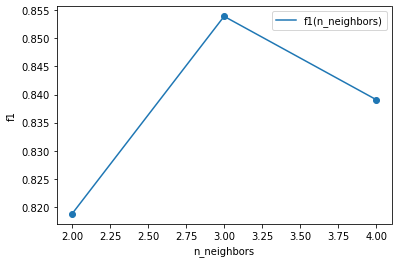

In [59]:
errors = np.array(errors)

plt.plot(errors[:, 0], errors[:, 1], label='f1(n_neighbors)')
plt.scatter(errors[:, 0], errors[:, 1])
plt.xlabel('n_neighbors')
plt.ylabel('f1')
plt.legend()
plt.show()

In [150]:
from sklearn.feature_selection import VarianceThreshold

In [157]:
def df_split_scaling(data, target, tst_size=None, trhd=None):
    data = VarianceThreshold(threshold=trhd).fit_transform(data)
    train, test, t_train, t_test = train_test_split(data, target, test_size=0.3, random_state=42)
    scaler = StandardScaler().fit(train)
    train_scale = scaler.transform(train)
    test_scale = scaler.transform(test)
    
    return train_scale, test_scale, t_train, t_test

In [183]:
def f1_score_clf(knn_model, lr_model=None, size=0.3, thresh=0.7):
    X_train, X_test, y_train, y_test = df_split_scaling(X_new, y, tst_size=size, trhd=thresh)
    knn_model.fit(X_train, y_train)
    knn_score = f1_score(y_test, knn_model.predict(X_test))
    if lr_model:
        lr_model.fit(X_train, y_train)
        lr_score = f1_score(y_test, lr_model.predict(X_test))
        print(f'Logistic Regression:{lr_score}, knn:{knn_score}')
        
        return lr_score, knn_score
        
    print(f'knn:{knn_score}')    
    print(f'test_size={size}, threshold={thresh}')
    
    return knn_score

In [170]:
# Наши лучшие модели после перебора

lr = LogisticRegression(solver='liblinear', max_iter=10000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, random_state=42)

In [163]:
# Кажется, что лог. регрессия нам много не даст, давайте будем работать над кнн

f1_score_clf(lr, knn)

Logistic Regression:0.7319148936170213, knn:0.8549019607843137
test_size=0.3, threshold=0.7


(0.7319148936170213, 0.8549019607843137)

In [171]:
# Что если мы переберем параметр threshold VarianceThreshold?

thresholds = [0.8, 0.9, 1., 1.1, 1.2]
for thresh in thresholds:
    f1_score_clf(knn, thresh=thresh)

knn:0.8387096774193549
test_size=0.3, threshold=0.8
knn:0.8467741935483872
test_size=0.3, threshold=0.9
knn:0.8049792531120333
test_size=0.3, threshold=1.0
knn:0.7966804979253113
test_size=0.3, threshold=1.1
knn:0.7586206896551724
test_size=0.3, threshold=1.2


In [172]:
from sklearn.feature_selection import SequentialFeatureSelector

In [1]:
selector = SequentialFeatureSelector(knn, scoring='f1', direction='forward', n_jobs=-1)

NameError: name 'SequentialFeatureSelector' is not defined

In [182]:
# Посмотрим, что у нас получилось



(284807, 10)

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Object `print()` not found.


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?